In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
phi_golden = const.golden_ratio # optional

from classy import Class

In [15]:
font = {'size'   : 14, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = [5.0*phi_golden,5.0]

In [16]:
#
fixed_settings = {
                'T_cmb':2.7255,
                'omega_b':0.02238280,
                'omega_cdm':0.1201075,
                'h':0.67810,
                'A_s':2.100549e-09, # amplitude of primodial power spectrum
                'n_s':0.9660499, # scalar spectral index
                'output':'tCl,pCl,lCl', # temperature, polarisation and lensing spectrum 
                'lensing':'yes' # say yes if you want CMB lensing, needs 'lCl'
                }

In [17]:
cosmo = Class()             # call class
cosmo.set(fixed_settings)   # input parameters 
cosmo.compute()             # compute cosmology
T_cmb = cosmo.T_cmb()       # get CMB temperature
raw_cl = cosmo.raw_cl(2500) # get raw Cl
cosmo.empty()               # clear input
cosmo.struct_cleanup()      # free the machine memory

In [18]:
# load dataset
dl = np.loadtxt('dataset/COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [26]:
## ---- TT spectrum -----
ell = dl.transpose()[0]
Dl = dl.transpose()[1]
errDl_lower = dl.transpose()[2]
errDl_upper = dl.transpose()[3]

<ErrorbarContainer object of 3 artists>

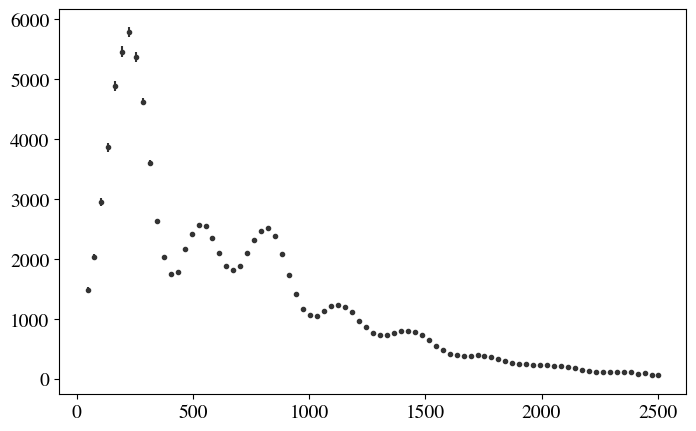

In [27]:
plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2')

<ErrorbarContainer object of 3 artists>

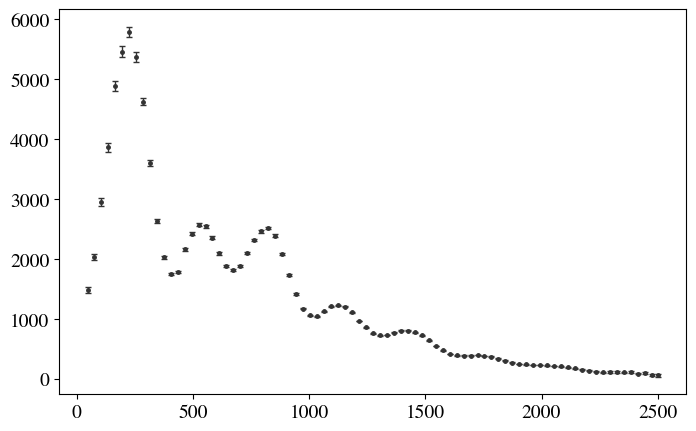

In [28]:
plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)

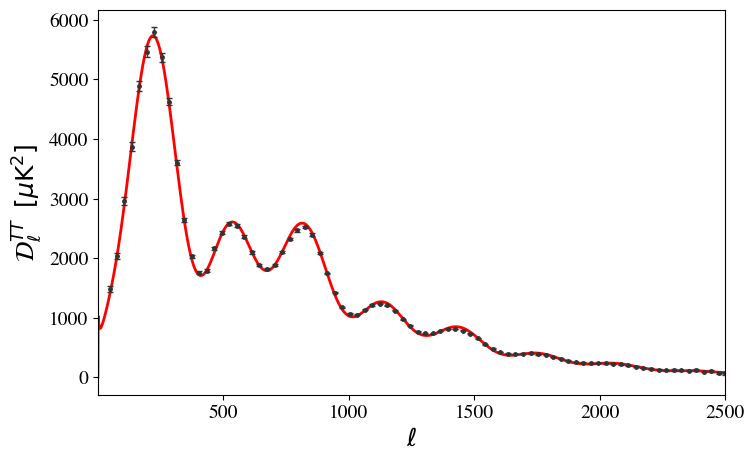

In [31]:
l = raw_cl['ell'][1:]
Cl_TT = raw_cl['tt'][1:]
factor = l*(l+1)/(2*np.pi)*T_cmb**2*1e12
plt.plot(l, factor*Cl_TT, color='r',lw=2)
plt.xlim(2, 2500)
plt.ylabel(r'$\mathcal{D}_\ell^{TT}\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)
plt.xlabel(r"$\ell$",fontsize=18)

plt.errorbar(ell, Dl, [errDl_lower, errDl_upper], fmt='.',color='0.2',elinewidth=1,ms=5,capthick=1,capsize = 2)
plt.show()
# plt.savefig('Cl_TT.pdf')

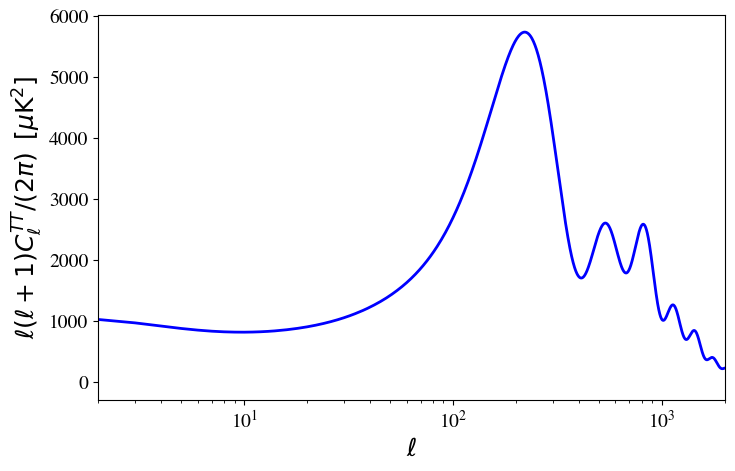

<Figure size 809.017x500 with 0 Axes>

In [25]:
# Plotting CMB TT spectrum

l = raw_cl['ell'][1:]
Cl_TT = raw_cl['tt'][1:]

factor = l*(l+1)/(2*np.pi)*cosmo.T_cmb()**2*1e12

plt.semilogx(l, factor*Cl_TT, color='b',lw=2)
plt.xlim(2,2010)
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/(2\pi)\,\,\,[\mu\mathrm{K}^2]$',fontsize=18)

plt.xlabel(r"$\ell$",fontsize=18)
plt.show()

plt.savefig('Cl_TT.png', )